# Thermal Image Processing 
Based on https://mybinder.org/v2/gh/danforthcenter/plantcv-binder.git/master?filepath=notebooks/thermal_tutorial/thermal.ipynb

The following script will explain step by step the xtraction of thermal values from a .csv file as a starting point.
Let's start by importing the packages we will use. 


In [1]:
import cv2
from plantcv import plantcv as pcv

In [4]:
class options:
    def __init__(self):
        self.image = "./thermal_data.csv"
        self.debug = "plot"
        self.writeimg= False
        self.result = "thermal_tutorial_results.csv"
        self.outdir = "."
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

## Step 1: 
Load the image using pcv.readimage () function from plant cv. Make sure you are calling a csv file. Mode = csv must be use as a parameter inside the functions. 

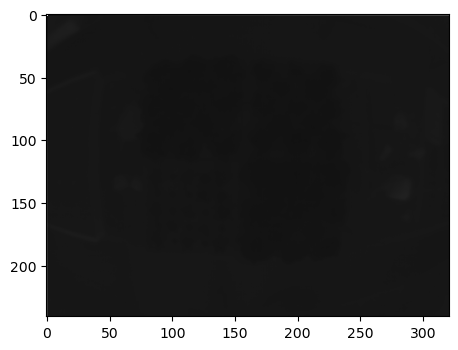

In [5]:
thermal_data, path, filename = pcv.readimage(filename=args.image, mode='csv')

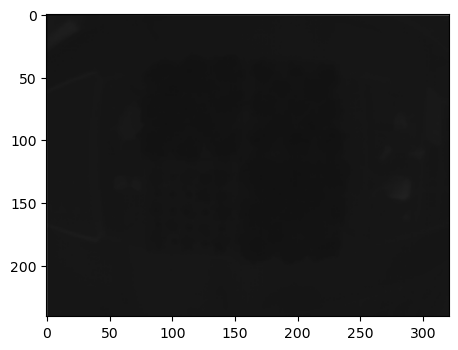

In [6]:
# Rescale the thermal data to a colorspace with range 0-255 rather than raw data 
    
# Inputs:
#   gray_img - Grayscale image data 
#   min_value - New minimum value for range of interest. default = 0
#   max_value - New maximum value for range of interest. default = 255
scaled_thermal_img = pcv.transform.rescale(gray_img=thermal_data)

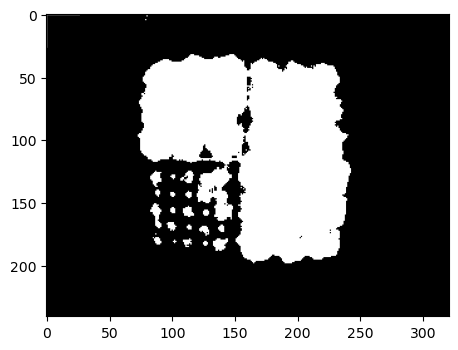

In [46]:
# Threshold the thermal data to make a binary mask
    
# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than the background then standard 
#                 threshold is done. If the object is darker than the background then inverse thresholding is done. 
bin_mask = pcv.threshold.binary(gray_img=thermal_data, threshold=25.7, max_value=255, object_type='dark')

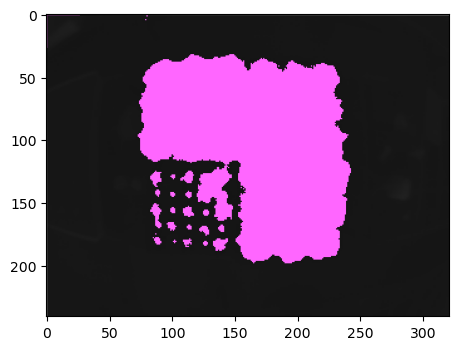

In [23]:
# Identify objects
    
# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
id_objects, obj_hierarchy = pcv.find_objects(img=scaled_thermal_img, mask=bin_mask)

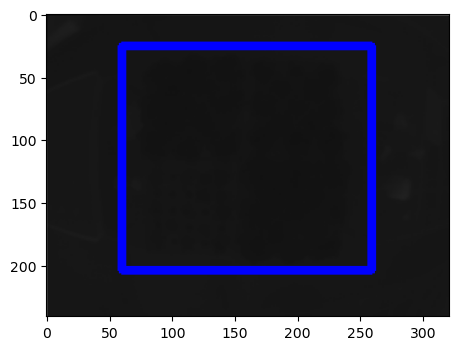

In [37]:
# Define the region of interest (ROI) 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
roi, roi_hierarchy= pcv.roi.rectangle(img=scaled_thermal_img, x=60, y=25, h=180, w=200)

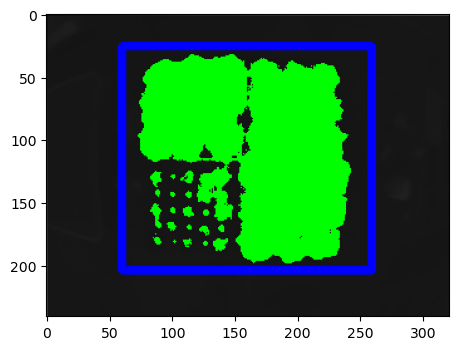

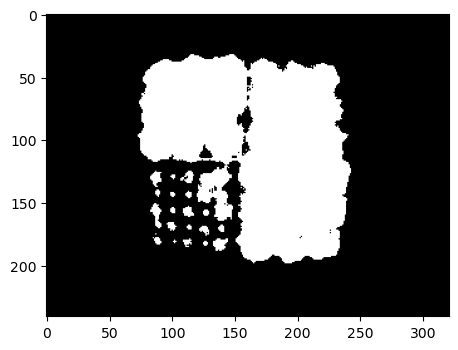

In [38]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)
roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img=scaled_thermal_img,roi_contour=roi,
                                                              roi_hierarchy=roi_hierarchy,
                                                              object_contour=id_objects,
                                                              obj_hierarchy=obj_hierarchy, 
                                                              roi_type='cutto')

## ANALYSIS OF THERMAL DATA: 

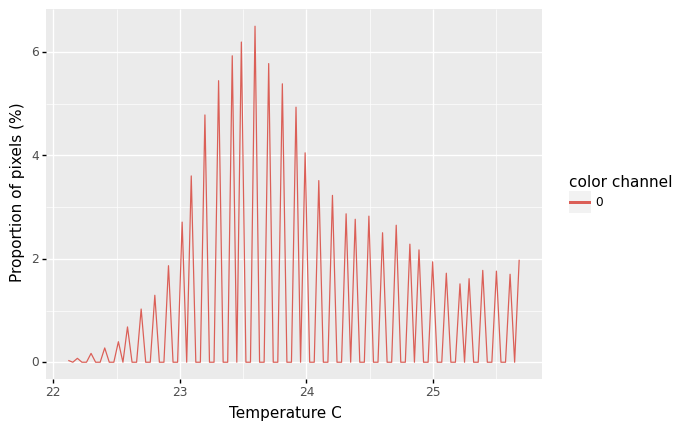

In [39]:
# Inputs:
#   img - Array of thermal values
#   mask - Binary mask made from selected contours
#   histplot - If True plots histogram of intensity values (default histplot = False)
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

analysis_img = pcv.analyze_thermal_values(thermal_array=thermal_data, mask=kept_mask, histplot=True, label="default")

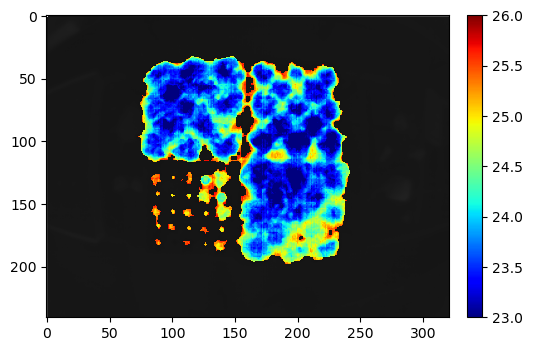

In [42]:
# Pseudocolor the thermal data 

# Inputs:
#     gray_img - Grayscale image data
#     obj - Single or grouped contour object (optional), if provided the pseudocolored image gets 
#           cropped down to the region of interest.
#     mask - Binary mask (optional) 
#     background - Background color/type. Options are "image" (gray_img, default), "white", or "black". A mask 
#                  must be supplied.
#     cmap - Colormap
#     min_value - Minimum value for range of interest
#     max_value - Maximum value for range of interest
#     dpi - Dots per inch for image if printed out (optional, if dpi=None then the default is set to 100 dpi).
#     axes - If False then the title, x-axis, and y-axis won't be displayed (default axes=True).
#     colorbar - If False then the colorbar won't be displayed (default colorbar=True)
pseudo_img = pcv.visualize.pseudocolor(gray_img = thermal_data, mask=kept_mask, cmap='jet', 
                                       min_value=23, max_value=26)

In [43]:
# Write thermal data to results file

# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
pcv.outputs.save_results(filename=args.result)